In [1]:
import os

mycwd = os.getcwd()

os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
import numpy as np
import pandas as pd
import tensorflow as tf
from notebooks.load_dataset.dataset import classes

In [2]:
from notebooks.base_model import base_history as hst_base

importing Jupyter notebook from e:\Goit\projects\Data_Science_core\final_data_project\ds_project\notebooks\base_model.ipynb

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928   

C:\Users\Lenovo-PC\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 56s 83ms/step - loss: 1.7265 - acc: 0.3680 - val_loss: 1.5944 - val_acc: 0.4381
Epoch 2/5
625/625 [==============================] - ETA: 0s - loss: 1.3290 - acc: 0.5246
Epoch 2: val_acc improved from 0.43810 to 0.53770, saving model to ../models\newmodel.h5
625/625 [==============================] - 49s 78ms/step - loss: 1.3290 - acc: 0.5246 - val_loss: 1.3093 - val_acc: 0.5377
Epoch 3/5
625/625 [==============================] - ETA: 0s - loss: 1.1427 - acc: 0.5981
Epoch 3: val_acc improved from 0.53770 to 0.58240, saving model to ../models\newmodel.h5
625/625 [==============================] - 40s 64ms/step - loss: 1.1427 - acc: 0.5981 - val_loss: 1.1615 - val_acc: 0.5824
Epoch 4/5
625/625 [==============================] - ETA: 0s - loss: 1.0199 - acc: 0.6432
Epoch 4: val_acc improved from 0.58240 to 0.61880, saving model to ../models\newmodel.h5
625/625 [==============================] - 42s 67ms/step - loss: 1.0199 - acc: 0.6432 - val_lo

In [3]:
def history_plot(history):
    plt.plot(history["acc"])
    plt.plot(history["val_acc"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["accuracy", "val_acc"])
    plt.grid()
    plt.title("Accuracy")
    plt.show()
    plt.legend(["loss", "val_loss"])
    plt.title("Loss")
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

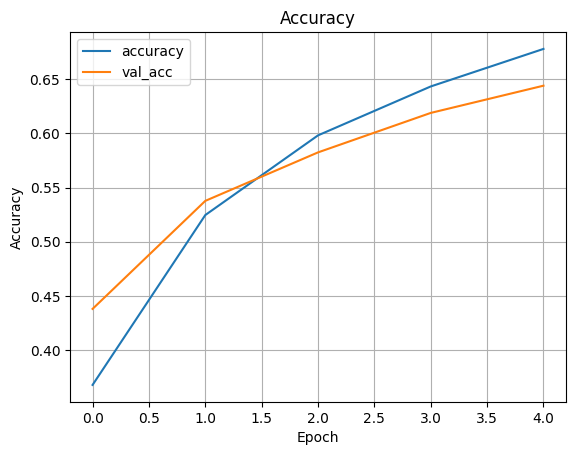

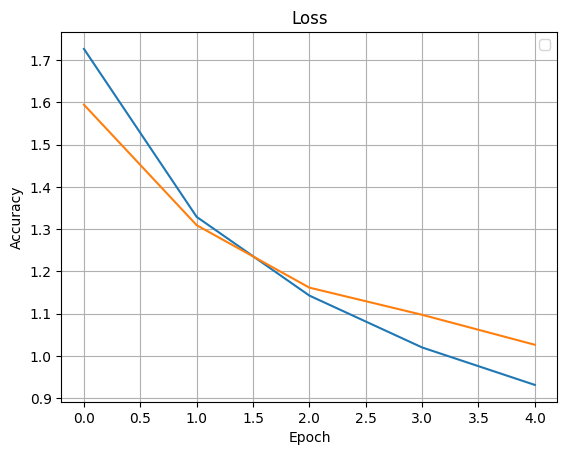

In [12]:
history_plot(hst_base)

In [ ]:
from notebooks.MobileNet_based import history_mobile as hst_mblnet

history_plot(hst_mblnet)

In [3]:
from notebooks.load_dataset.dataset import classes

def calculate_percent_right(test, labels, model):
    print(type(test))
    y_pred_probs = model.predict(test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(labels, axis=1)

    correct_counts = np.zeros(10, dtype=np.int32)
    total_counts = np.zeros(10, dtype=np.int32)

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_counts[true_label] += 1
        total_counts[true_label] += 1

    ratios = correct_counts / total_counts
    print("Базова модель:\n")
    for i, ratio in enumerate(ratios):
        print(
            f"Класс {i} ({classes[i]}): правильно классифицировано {correct_counts[i]} из {total_counts[i]} ({ratio:.2%})"
        )

In [5]:
from notebooks.load_dataset.dataset import x_test_base, y_test_base

base_model = tf.keras.models.load_model("models/newmodel.h5")

calculate_percent_right(x_test_base, y_test_base, base_model)

<class 'numpy.ndarray'>
1563/1563 [==============================] - 20s 13ms/step
Базова модель:

Класс 0 (airplane): правильно классифицировано 112 из 1000 (11.20%)
Класс 1 (automobile): правильно классифицировано 97 из 1000 (9.70%)
Класс 2 (bird): правильно классифицировано 92 из 1000 (9.20%)
Класс 3 (cat): правильно классифицировано 95 из 1000 (9.50%)
Класс 4 (deer): правильно классифицировано 146 из 1000 (14.60%)
Класс 5 (dog): правильно классифицировано 78 из 1000 (7.80%)
Класс 6 (frog): правильно классифицировано 98 из 1000 (9.80%)
Класс 7 (horse): правильно классифицировано 103 из 1000 (10.30%)
Класс 8 (ship): правильно классифицировано 106 из 1000 (10.60%)
Класс 9 (truck): правильно классифицировано 83 из 1000 (8.30%)


In [7]:
from notebooks.load_dataset.dataset import x_test_mob, y_test_mob

mob_model = tf.keras.models.load_model("models/mn_model.keras")

x_test_mob = np.array(x_test_mob, dtype=np.float32)
y_test_mob = np.array(y_test_mob, dtype=np.int32)

y_pred_probs = mob_model.predict(x_test_mob)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test_mob

correct_counts = np.zeros(10, dtype=np.int32)
total_counts = np.zeros(10, dtype=np.int32)

for true_label, pred_label in zip(y_true, y_pred):
    if true_label == pred_label:
        correct_counts[true_label] += 1
    total_counts[true_label] += 1

ratios = correct_counts / total_counts
print("Модель MobileNet:\n")
for i, ratio in enumerate(ratios):
    print(
        f"Класс {i} ({classes[i]}): правильно классифицировано {correct_counts[i]} из {total_counts[i]} ({ratio:.2%})"
    )

313/313 [==============================] - 56s 172ms/step
Класс 0 (airplane): правильно классифицировано 810 из 1000 (81.00%)
Класс 1 (automobile): правильно классифицировано 905 из 1000 (90.50%)
Класс 2 (bird): правильно классифицировано 818 из 1000 (81.80%)
Класс 3 (cat): правильно классифицировано 715 из 1000 (71.50%)
Класс 4 (deer): правильно классифицировано 826 из 1000 (82.60%)
Класс 5 (dog): правильно классифицировано 627 из 1000 (62.70%)
Класс 6 (frog): правильно классифицировано 853 из 1000 (85.30%)
Класс 7 (horse): правильно классифицировано 740 из 1000 (74.00%)
Класс 8 (ship): правильно классифицировано 880 из 1000 (88.00%)
Класс 9 (truck): правильно классифицировано 878 из 1000 (87.80%)
